In [12]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [13]:
df = pd.read_csv('/content/train.csv',usecols=["Survived","Age","Fare"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [15]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [16]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [17]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [18]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [19]:
x.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

<ipython-input-21-fa21fdceb15e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train["Age"])


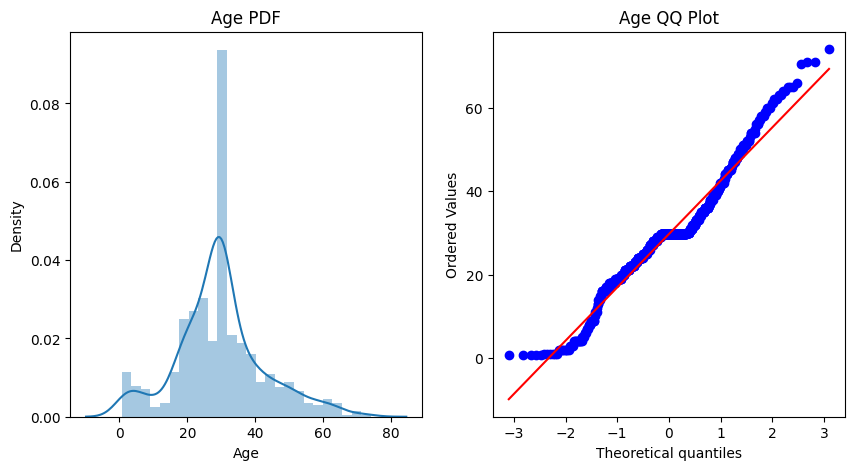

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)      #plt.subplot(1, 2, 1) the figure has 1 row, 2 columns, and this plot is the first plot.

sns.distplot(x_train["Age"])
plt.title("Age PDF")

plt.subplot(1,2,2)
stats.probplot(x_train["Age"],dist="norm",plot=plt)
plt.title("Age QQ Plot")

plt.show()

<ipython-input-22-11cb8f430cb6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


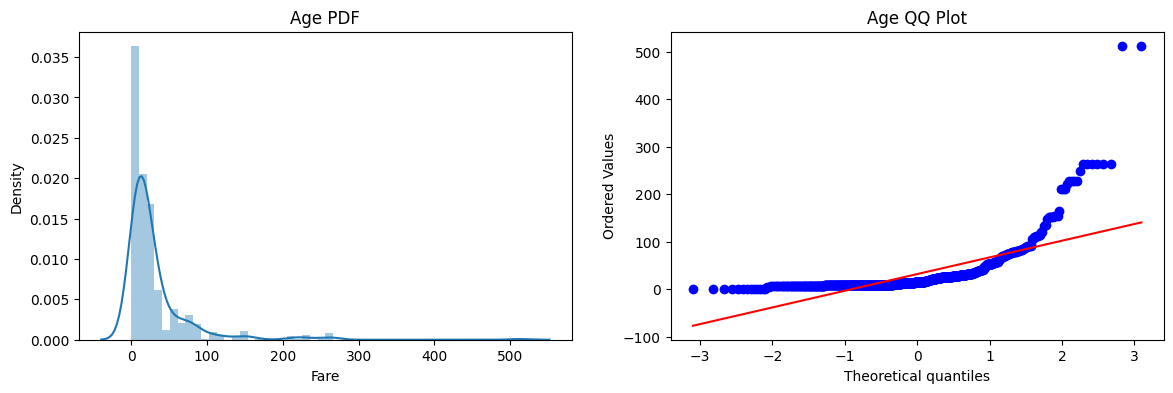

In [22]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [23]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [24]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred2 = clf2.predict(x_test)

print("logistic Regression Accuracy",accuracy_score(y_test,y_pred))
print("Decision Tree Accuracy",accuracy_score(y_test,y_pred2))

logistic Regression Accuracy 0.6536312849162011
Decision Tree Accuracy 0.6480446927374302


In [25]:
trf = FunctionTransformer(np.log1p)

In [27]:
x_train_transform = trf.fit_transform(x_train)
x_test_transform = trf.transform(x_test)

In [29]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transform,y_train)
clf2.fit(x_train_transform,y_train)

DecisionTreeClassifier()

In [31]:
y_predict = clf.predict(x_test_transform)
y_predict2 = clf2.predict(x_test_transform)

print("Logistic Regression Accuracy Score",accuracy_score(y_test,y_predict))
print("Decision Tree Accuracy Score",accuracy_score(y_test,y_predict2))

Logistic Regression Accuracy Score 0.6983240223463687
Decision Tree Accuracy Score 0.6201117318435754


In [32]:
x_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()


print("LR",np.mean(cross_val_score(clf,x_transformed,y,scoring="accuracy",cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed,y,scoring="accuracy",cv=10)))

LR 0.678027465667915
DT 0.6655555555555556


Text(0.5, 1.0, 'Fare QQ Plot')

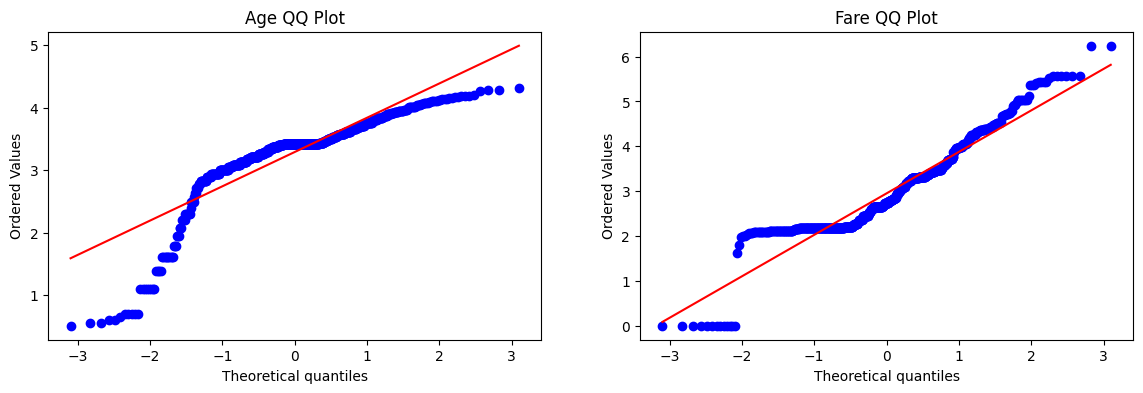

In [34]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
stats.probplot(x_train_transform["Age"],dist="norm",plot=plt)
plt.title("Age QQ Plot")

plt.subplot(1,2,2)
stats.probplot(x_train_transform["Fare"],dist="norm",plot=plt)
plt.title("Fare QQ Plot")

In [58]:
def apply_transform(transform):
  x = df.iloc[:,1:3]
  y = df.iloc[:,0]
  trf = ColumnTransformer([("log",FunctionTransformer(transform),["Fare"])],remainder="passthrough")
  x_trans = trf.fit_transform(x)

  clf = DecisionTreeClassifier()

  print("Accuracy",np.mean(cross_val_score(clf,x_trans,y,scoring="accuracy",cv = 10)))

  plt.figure(figsize=(14,4))

  plt.subplot(1,2,1)
  stats.probplot(x["Fare"],dist="norm",plot=plt)
  plt.title("Before Transformation QQ plot")


  plt.subplot(1,2,2)
  stats.probplot(x_trans[:,0],dist="norm",plot= plt)
  plt.title("After Transformation QQ plot")


  plt.show()

Accuracy 0.6610736579275904


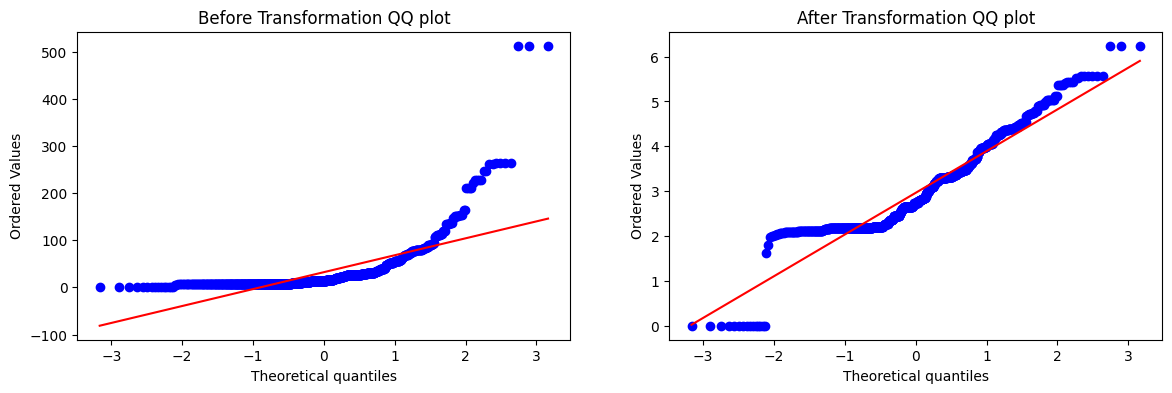

In [59]:
apply_transform(np.log1p)

Accuracy 0.6611485642946316


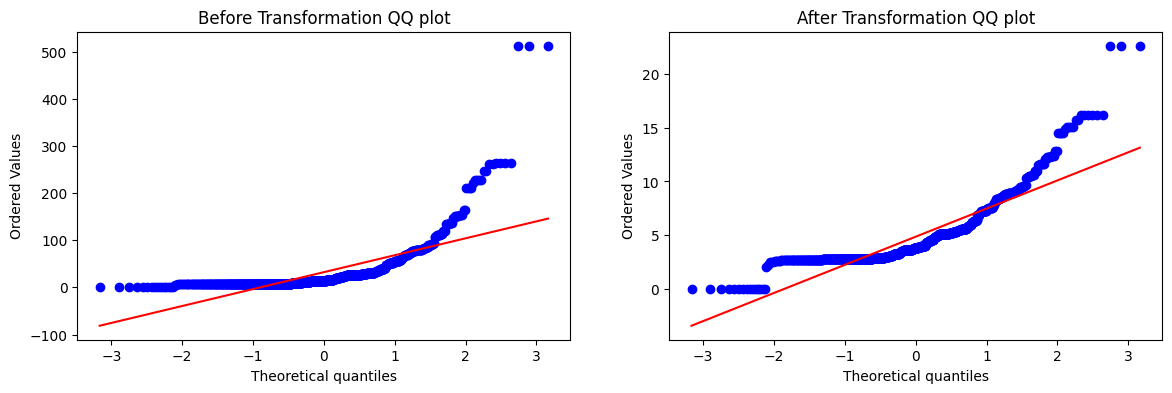

In [57]:
apply_transform(np.sqrt)